# Homework 1 - this is for all practical purposes a copy of hw2 from cs109a fall 2017
# Linear and k-NN Regression


---

### INSTRUCTIONS

- do the assignment in groups of three. Only one assignment must be submitted for the group.
- This does not mean that you are to divide and conquer. In the spirit of learning and getting the most out of this course, you should solve each problem on your own, compare with your partner, and decide on a common solution.
- Restart the kernel and run the whole notebook again before you submit. 
- Submit a printed copy of the assignment in the beginning of class October 1. Every class missed will result in a late penalty of 33%.
- Also send a zipped copy of all files(run ipython notebooks) to msjamall@iba.edu.pk. Use subject CS562: hw1; <group member 1's name>; <group member 2's name>; <group member 3's name>

---

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

In [2]:
train = pd.read_csv('dataset_1_train.txt',sep=",") 
test = pd.read_csv('dataset_1_test.txt', sep=",") 

#max_normalization
train.TimeMin = train.TimeMin/np.max(train.TimeMin)
print(train.TimeMin)
test.TimeMin = test.TimeMin/np.max(test.TimeMin)
print(test.TimeMin)


0      0.598053
1      0.011822
2      0.337969
3      0.208623
4      0.267733
5      0.444367
6      0.569541
7      0.614047
8      0.479833
9      0.047288
10     0.027816
11     0.307371
12     0.748957
13     0.505563
14     0.556328
15     0.970793
16     0.493046
17     0.102921
18     0.745480
19     0.591794
20     0.949235
21     0.889430
22     0.600139
23     0.086231
24     0.780946
25     0.440195
26     0.237830
27     0.264951
28     0.514604
29     0.715577
         ...   
220    0.982615
221    0.431154
222    0.573713
223    0.377608
224    0.178025
225    0.036161
226    0.748957
227    0.355355
228    0.337969
229    0.194715
230    0.269819
231    0.627260
232    0.940195
233    0.352573
234    0.074409
235    0.655076
236    0.615438
237    0.326147
238    0.993046
239    0.013213
240    0.922114
241    0.717663
242    0.916551
243    0.961752
244    0.613352
245    0.266342
246    0.943672
247    0.922809
248    0.344228
249    0.930459
Name: TimeMin, Length: 2

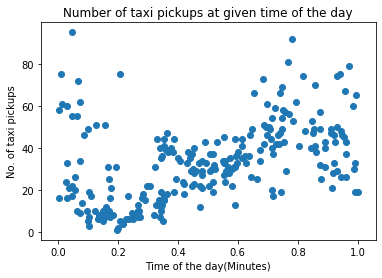

In [3]:
plt.scatter(train.TimeMin, train.PickupCount);
plt.xlabel('Time of the day(Minutes)');
plt.ylabel('No. of taxi pickups');
plt.title('Number of taxi pickups at given time of the day');


The scatter plot shown above does not have any clear pattern/trend, weak corelation.plot shows that the number of taxi pickups seems to be the highest during the morning and evenings.

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

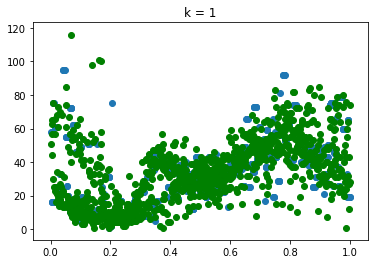

R^2 score: train=0.8108889086047287, test=-0.0559429925790218


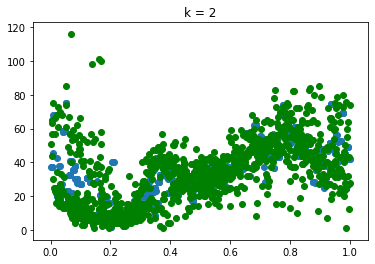

R^2 score: train=0.6419450624361964, test=0.2392310368766779


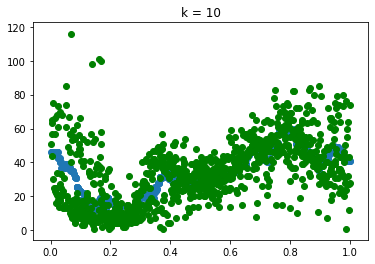

R^2 score: train=0.4594125977478272, test=0.41723254530227527


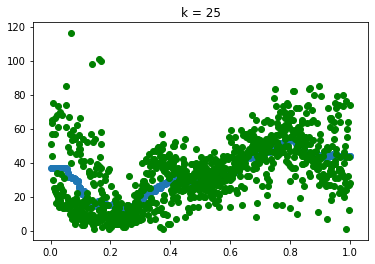

R^2 score: train=0.41937720357265984, test=0.4132484196758563


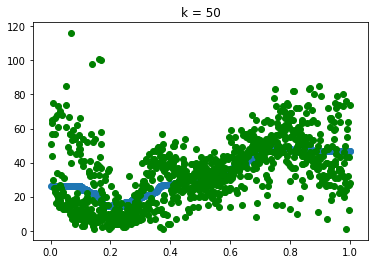

R^2 score: train=0.35362913382201155, test=0.38024704730187275


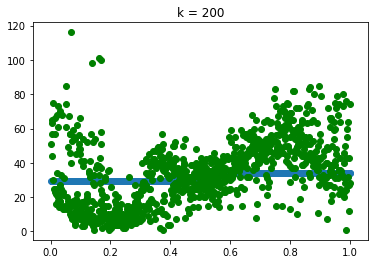

R^2 score: train=0.1086521345329049, test=0.10961990256955788


In [4]:
X_train, y_train = train.TimeMin.values.reshape(-1, 1), train.PickupCount.values.reshape(-1, )
X_test, y_test = test.TimeMin.values.reshape(-1, 1), test.PickupCount.values.reshape(-1, )
train_R2 = []
test_R2 = []
k_values = [1, 2, 10, 25, 50, 200]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k )
    knn.fit(X_train, y_train)
    plt.scatter(X_test, knn.predict(X_test))  
    plt.scatter(X_test, y_test, color = 'green')
    plt.title('k = '+str(k))
    plt.show()
    train_R2.append(knn.score(X_train, y_train))
    test_R2.append(knn.score(X_test, y_test))
    print('R^2 score: ' +'train=' +str(knn.score(X_train, y_train)) +', ' + 'test='+ str(knn.score(X_test, y_test)))


Q) If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function?
Ans) fit() method trains and fit the model on the training data (X_train, y_train) for different values of k

Q) If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
Ans) When k is maximum, model becomes simple with high bias and low variance + accuracy decreases.Based on the plots, the ideal k seems to be around 50. This will give us the best fit for the data. Anything smaller seems to overfit the data and anything larger seems to generalize too much

Q) How does the value of $k$ effect the fitted model?
Ans) As the value of k incresases, difference between predicted values and predictor variable(X_test =TimeMin) decreases

Q) Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
Ans) Yes, it shows that the chosen model doesnot follow the trend of data so it fits worse than a horizontal line

Text(0.5, 1.0, 'Testing accuracy for train data')

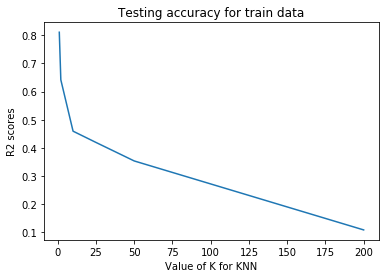

In [5]:
plt.plot(k_values, train_R2)
plt.xlabel('Value of K for KNN')
plt.ylabel('R2 scores')
plt.title('Testing accuracy for train data')

Text(0, 0.5, 'R2 scores')

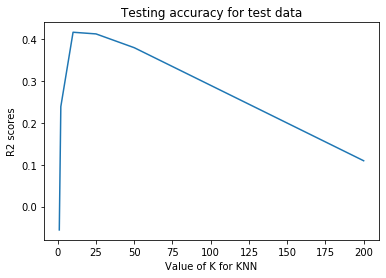

In [6]:
plt.title('Testing accuracy for test data')
plt.plot(k_values, test_R2)
plt.xlabel('Value of K for KNN')
plt.ylabel('R2 scores')

Q) Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.
Ans) Training and test data shows different trends. For train data, R2 score decreases gradually as the values of K become large. On the other hand, test data plot shows a sharp increase of R2 score till k=25 then r2 score starts decreasing for a higher value of k. 

# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

In [7]:
train_col = sm.add_constant(X_train)
model = sm.OLS(y_train, train_col)
results = model.fit()
train_pred = results.predict(train_col)
test_pred = results.predict(sm.add_constant(X_test))
print(results.summary())
print(results.params)
print('\nR2 scores of train data:\n', r2_score(y_train, train_pred))
print('\nR2 scores of test data:\n',r2_score(y_test, test_pred))
print('\nConfidence Intervals=95%:\n', results.conf_int(.05))
print('\nConfidence Intervals=99%:\n',results.conf_int(.01))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     64.82
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           3.43e-14
Time:                        13:00:03   Log-Likelihood:                -1060.1
No. Observations:                 250   AIC:                             2124.
Df Residuals:                     248   BIC:                             2131.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0264      2.121      8.501      0.0

Q) How does the test 𝑅2 score compare with the best test 𝑅2 value obtained with k-NN regression in Part (a)?
Ans) Best test R2 value obtained with k-NN regression (i.e. 0.417) is higher than the test R2 score obtained with linear regression (i.e. 0.248)

Q) Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
Ans) slope = 30.3 
     intercept = 18.03
     Sign of the slope is positive which means data is correlated.

Q) Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
Ans) A 95% confidence interval is a range of values that you can be 95% confident that our true slope and intercept will be a point on the interval.Yes it is reliable. The slope and intercept fits in the range.

Q) Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.5
Ans) 99% confidence interval would be loser because it should capture more variance in the data to be 99% confident that our true slope and intercept will be a point on the interval

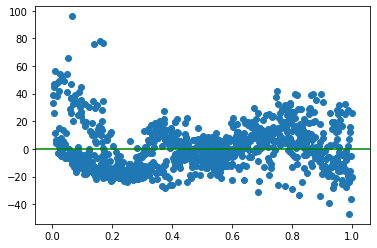

In [19]:
plt.scatter(X_test, y_test-test_pred)
plt.axhline(y=0, color = 'green')

Q) Using this residual plot, comment on whether the assumption of linearity is valid for this data.
Ans) The assumption of linearity appears to not hold for this data, the residual plots are not randomly distributed across the x-axis and instead follow a clear pattern as shown below 

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:

- By visual inspection, what polynomial degree do you think would provide the best fit for the data?

- At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

Q) By visual inspection, what polynomial degree do you think would provide the best fit for the data?
Ans)n=10 appears to best fit the data. As n gets larger, the polynomial function appears to be affected by noise.

Q) Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?
Ans) larger values being more greatly affected by being input into high degree functions. results will be biased towards the outiers.

0.2324332710285808 0.25572414216191586
0.3748362391177078 0.37858436224816694
0.4282770686193599 0.4020078006943709
0.4632753182990559 0.38369152730233325
0.4891911484812448 0.33338605829173007


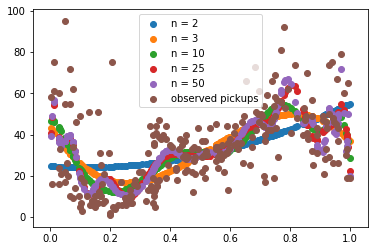

In [16]:
fig, ax = plt.subplots(1,1)
degrees = [2, 3, 10, 25, 50]
for n in degrees:
    p = PolynomialFeatures(degree = n)
    #when you want to train your model without any pre-processing on the data-fit function
    #when you want to do pre-processing on the data using one of the functions from sklearn.preprocessing-Transform function
    x1 = p.fit_transform(X_train) 
    x2 = p.fit_transform(X_test) 
    model = sm.OLS(y_train, x1)
    results =model.fit()
    prediction = results.predict(x1)
    prediction_test =results.predict(x2)
    print( r2_score(y_train,prediction), r2_score(y_test,prediction_test))
    ax.scatter(X_train, prediction, label = "n = "+ str(n))
    
ax.scatter(X_train, y_train, label ='observed pickups')    
ax.legend()

Q) Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?
Ans) By looking at our R2 scores of the fitted models on both training and test data and the visualization above at different values of n, we see that n = 10 appears to best fit the data while not overfitting. As n gets larger, the polynomial function appears to be affected by noise in the data, and thus does not generalize well. For high training R^2 value, test R^2 value is not always high. R^2 value at n =2 is almost equal to the test R^2 from simple linear regression and R^2 value at n=10 is almost same as the and the best test $R^2$ from k-NN regression in Part (a)

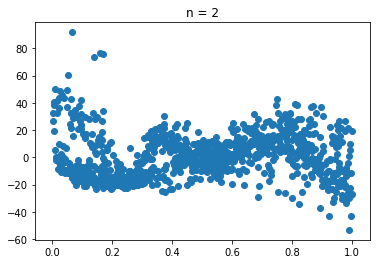

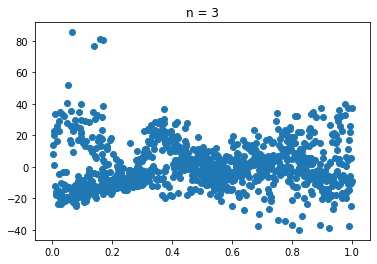

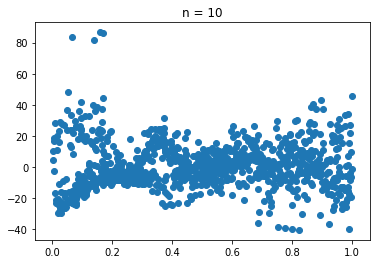

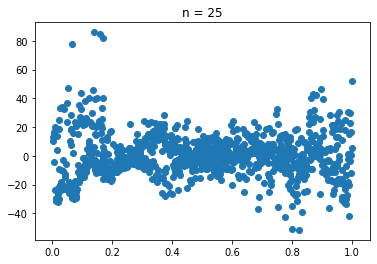

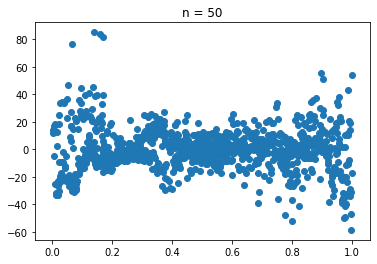

In [27]:
degrees = [2, 3, 10, 25, 50]
for n in degrees:
    p = PolynomialFeatures(degree = n)
    x1 = p.fit_transform(X_train) 
    x2 = p.fit_transform(X_test) 
    model = sm.OLS(y_train, x1)
    results =model.fit()
    prediction = results.predict(x1)
    prediction_test =results.predict(x2)
    plt.scatter(X_test, y_test-prediction_test)
    plt.title('n = '+str(n))
    plt.show()

Q) How does the increase in polynomial degree effect the residual plots?
Ans) distance between data points has decreased

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.

Ans) From the above, so far our best model is the k-nn model with n = 10. This model is simple to implement and gives us the best prediction accuracy. This makes intuitive sense beacause the number of taxi pickups at a certain time of day is likely to be similar to the number of pickups in some time interval before and after the pickup time.

---- 
